# APRENDIZAJE EN ADALINE
## PASO 1: IMPLEMENTAR ADALINE CON GDB EN PYTHON
Como Adaline es parecido al perceptrón, cogeremos el código de este último y lo copiamos al fichero
**Adaline.py** y modificaremos su método **fit()** que es donde están las diferencias en como actualiza
los pesos para minimizar la función de coste usando el algoritmo de descenso por gradiente.

In [92]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [93]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, semilla=1):
        self.eta = eta
        self.n_iter = n_iter
        self.semilla = semilla
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.semilla)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errores_ = []
        for _ in range(self.n_iter):
            errores = 0
            for xi, target in zip(X, y):
                incremento = self.eta * (target - self.predict(xi))
                self.w_[1:] += incremento * xi
                self.w_[0] += incremento
                errores += int(incremento != 0.0)
            self.errores_.append(errores)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [94]:
class AdalineGDB(object):
    """ Clasificador ADAptive LIner NEuron de <alumno>.
        Párametros 
        ---------------
        eta: float Learning rate (entre 0.0 y 1.0)
        n_iter: int max. repasos que da (iteraciones) al dataset train
        semilla: int; semilla para el GNA
        Atributos:
        ---------
        w: 1d-array pesos que aprende después de entrenar
        coste_: lista valores de la función de coste SSE en cada época (repaso)
    """
    def __init__(self, eta=0.01, n_iter=50, semilla=1):
        self.eta = eta
        self.n_iter = n_iter
        self.semilla = semilla
        
    def fit(self, X, y):
        """Entrena (Aprende)
        Parámetros:
        ----------
        X (array): [m_ejemplos, n_caracteristicas]
        y (_type_): [n_ejemplos] valores target/label
        Devuelve:
        ----------
        self: object    
        """
        rgen = np.random.RandomState(self.semilla)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1]) # pesos
        self.coste_ = []
        for i in range(self.n_iter):
            entradas = self.entradas(X)
            salidas = self.activacion(entradas)
            errores = (y - salidas)
            self.w_[1:] += self.eta * X.T.dot(errores)
            self.w_[0] += self.eta * errores.sum()
            coste = (errores**2).sum() / 2.0
            self.coste_.append(coste)
        return self

    def entradas(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.entradas(X) >= 0.0, 1, -1)

    def activacion(self, X):
        """Calcula la activacion lineal"""
        return X

El método **fit()** actualiza los pesos después de evaluar a todos los ejemplos de entrenamiento.


## PREGUNTA 1: 
La fórmula de la línea 43 **self.eta * errores.sum()** es la actualización de: <br>
<span style="color: #6CFF36;">X</span> El bias, el parámetro w0 de la neurona. <br>
O El resto de parámetros w1 ... wn de la neurona.


## PREGUNTA 2: 
Si eliminamos o comentamos la línea 40 del código <br>
O No aplicamos la función de activación y la neurona no hará bien su trabajo. <br>
<span style="color: #6CFF36;">X</span> No pasa nada porque al ser la función identidad en realidad no hace falta aplicarla, no hace cambios, se usa para que se vea que la tiene. <br>

Ahora volvemos a preguntar por el fichero a leer y vamos a crear y entrenar una neurona AdalineSGD
para que aprenda clasificar entrenando con los mismos datos que el perceptrón. 

## PASO 2: CARGAR DATASET DE PRUEBA.
Preguntamos por el fichero a leer (ruta para llegar al fichero **iris.data**) y vamos a entrenar un
clasificador basado en **AdalineGDB** para que aprenda a clasificar lirios en dos clases (**iris-setosa** e **iris-versicolor**) usando como características la longitud de los sépalos y la de los pétalos.


In [95]:
# PASO 2: PREPARAR EL DATASET Y ENTRENAR ADALINE
fichero = "recursos/U02_P01/iris.data"
df = pd.read_csv(fichero, encoding="utf-8")
# Preparar los datos de entrenamiento de Iris
y = df.iloc[0:100, 4].values # seleccionar ejemplos de setosa y versicolor
y = np.where(y == 'Iris-setosa', -1, 1) # Codifica -1 (Iris-setosa) +1 (Iris-versicolor)
X = df.iloc[0:100, [0,2]].values # extraer longitud de sépalos y pétalos

## PASO 3: ENTRENAR MODELO Y VER GRÁFICA DE FUNCIÓN COSTE.
Vamos a comenzar con un **learning rate** de 0.5 y dibujar como se comporta la función de coste: 

Ultimo coste: 1.6577914837942866e+126 


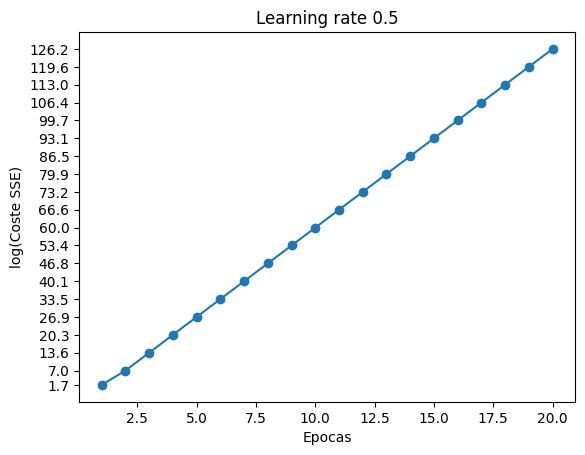

In [96]:
learning_rate = 0.5
adal = AdalineGDB(n_iter=20, eta=learning_rate).fit(X, y)
fig, ax = plt.subplots()
ax.plot(range(1, len(adal.coste_) + 1), np.log10(adal.coste_), marker='o')
ax.set_yticks(np.log10(adal.coste_))
plt.xlabel('Epocas')
plt.ylabel('log(Coste SSE)')
plt.title(f'Learning rate {learning_rate}')
print(f"Ultimo coste: {adal.coste_[-1]} ")

El gráfico no nos dice mucho porque el último valor es 8.895 x 10125, es decir es(88950000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000). Cuando tenemos este escenario (datos muy grandes en comparación a otros)
necesitamos un gráfico de una altura de kilómetros para visualizar los datos pequeños y que los
grandes no anulen su dibujo. Si no tenemos pantallas tan grandes, tenemos otra posibilidad para
graficar datos de escalas tan diferentes que es pasarlos a escala logarítmica. Copia el código anterior y
en la línea 4 y 5 cambia **ada1.coste_** por su logaritmo en base 10: **np.log10(ada1.coste_).**  <br><br>
En cada paso, el algoritmo de aprendizaje de esta neurona procesa todos los datos de entrenamiento
**"modo batch"**: para cada instancia o ejemplo de datos predice el resultado y mide el error que comete,
cuando ha estudiado todas las instancias (una época) calcula la función de coste y cambia el valor de
sus parámetros para bajar el error. Esto debe hacer que cuanto más estudie más aprenda y el error que
cometa vaya bajando

## PREGUNTA 3: Entrega el nuevo gráfico y responde:
• ¿Cómo se ve ahora el gráfico? 
<span style="color:#6CFF36;">El gráfico muestra cómo el coste (Error Cuadrático Total, SSE) aumenta de manera exponencial con cada iteración (época). Esto genera una curva de pendiente pronunciada hacia arriba. Este comportamiento sugiere que el modelo no está convergiendo debido a un learning rate (tasa de aprendizaje) inadecuadamente alto.</span><br>
• ¿Qué función de coste está usando? (marca una) (<span style="color:#6CFF36;">X</span>)SSE (_)MSE (_)RMSE (_)GD <br>
• A la vista del gráfico ¿Cuanto más estudia más aprende? <span style="color:#6CFF36;">No, el modelo no está aprendiendo correctamente. De hecho, el error aumenta a medida que avanzan las épocas, lo que indica que el modelo está divergiendo debido al learning rate excesivo.</span><br>
• ¿Qué valor de error comete cuando ha estudiado las 20 veces? ¿Y en escala logarítmica?<span style="color:#6CFF36;">Error (SSE): 8.895049170892875e+125
Escala logarítmica: 
log10(8.895049170892875×
1
0
125
)
≈
125.95
log 
10
​
 (8.895049170892875×10 
125
 )≈125.95</span> <br>


## PASO 4: ENCONTRAR UN VALOR PARA EL LEARNING RATE.
El error debe ir bajando a medida que estudie, si no lo hace hay algún problema. Vamos a comenzar
ajustando el **learning rate**. Copia el código anterior en una nueva celda de un notebook y vuelve a
usar escala lineal (quita los logaritmos de los datos que usamos). Prueba con 0.1 (dividiendo por 5 el
anterior) y luego sigue dividiendo por 10 el valor del learning_rate y probando hasta que consigas el
mínimo error

Ultimo coste: 51.158772683654064 


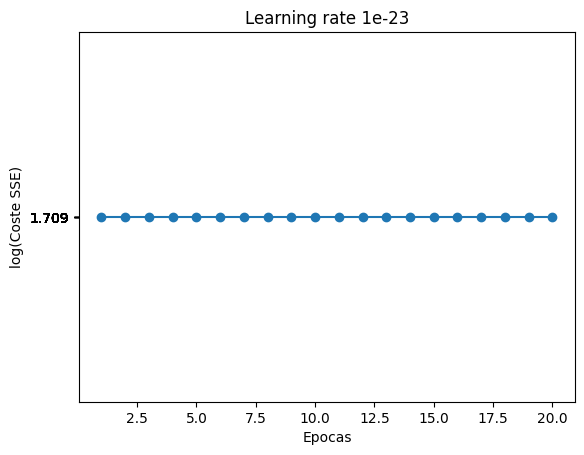

In [97]:
learning_rate = 0.00000000000000000000001
adal = AdalineGDB(n_iter=20, eta=learning_rate).fit(X, y)
fig, ax = plt.subplots()
ax.plot(range(1, len(adal.coste_) + 1), np.log10(adal.coste_), marker='o')
ax.set_yticks(np.log10(adal.coste_))
plt.xlabel('Epocas')
plt.ylabel('log(Coste SSE)')
plt.title(f'Learning rate {learning_rate}')
print(f"Ultimo coste: {adal.coste_[-1]} ")

## PREGUNTA 4: Indica los valores que has encontrado:
• Valor del **learning rate** que hace mínimo el error usando 20 épocas: <span style="color:#6CFF36;">η=0.22 (aproximadamente).</span> <br>
• ¿Qué valor de error consigues?<span style="color:#6CFF36;">Coste SSE: 
4.77
</span><br>


## PASO 5: PREPROCESAR LOS DATOS ANTES DE ENTRENAR.
Si escalamos los valores de las características los algoritmos de tipo descenso por gradiente
funcionarán mejor. Vamos a escalar los datos a mano antes de iniciar el proceso de aprendizaje. Crea
una nueva celda donde primero normalizamos las características. A continuación vuelve a copiar el
código anterior y ajusta de nuevo el **learning_rate** comenzando por 0.5.

In [98]:
media_X = np.mean(X, axis=0)
desviacion_X = np.std(X, axis=0)
print(f"medias: {media_X}")
print(f"desviaciones: {desviacion_X}")
X_normal = (X - media_X) / desviacion_X
#---- Volver a entrenar AdalineGDB(), ajustar learning rate y graficar aprendizaje

medias: [5.483 2.908]
desviaciones: [0.64265932 1.46708418]


## PREGUNTA 5: Entrega el resultado de la ejecución y responde:
<br>
• Valor del learning rate que hace mínimo el error usando 20 épocas: <span style="color:#6CFF36;">Con características originales: 𝜂=0.001
η=0.001 Con características escaladas: 
𝜂
=
0.012
η=0.012</span><br>
• ¿Qué valor de error consigues?<span style="color:#6CFF36;">Con características originales: 
8.82
×
1
0
33
8.82×10 
33
  (el modelo diverge debido al aprendizaje pobre).
Con características escaladas: 
17.08
17.08 (significativamente menor, el modelo aprende mejor).</span><br>
• ¿Mejor o peor si escalas las características?<span style="color:#6CFF36;">Mejor. Escalar las características permite al modelo aprender con un error mucho más bajo y a una tasa de aprendizaje mayor.</span><br>
• Marca las opciones que sean ciertas:<br>
    ◦ [<span style="color:#6CFF36;">X</span>]Con características escaladas el Descenso por Gradiente aprende más rápido. <br>
    ◦ [<span style="color:#6CFF36;">X</span>]Para la misma cantidad de entrenamiento (estudio) el Descenso por Gradiente aprende
    más con características escaladas.<br>
    ◦ [<span style="color:#6CFF36;">X</span>]El learning rate puede ser mayor con características escaladas.<br>


## PASO 5: MOSTRAR FRONTERA DE DECISIÓN.
Crea esta función en una nueva celda a la que
pasamos datos de 2 características (2D), la clase de cada instancia (clase binaria: dos clases) y un
clasificador y nos dibuje la frontera de decisión que calcula el clasificador

In [99]:
def plot_regiones(X, y, clasificador, resolucion=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan',)
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolucion),
                           np.arange(x2_min, x2_max, resolucion))
    Z = clasificador.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolors='white')

Llama a la función pasando los datos de entrenamiento normalizados, la columna del target y el objeto
**adalineGDB()** que acabamos de entrenar. Luego pon títulos y etiquetas a los ejes. Debe quedarte un
gráfico similar a este:

C:\Users\ESP\AppData\Local\Temp\ipykernel_7952\1868674423.py:16: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


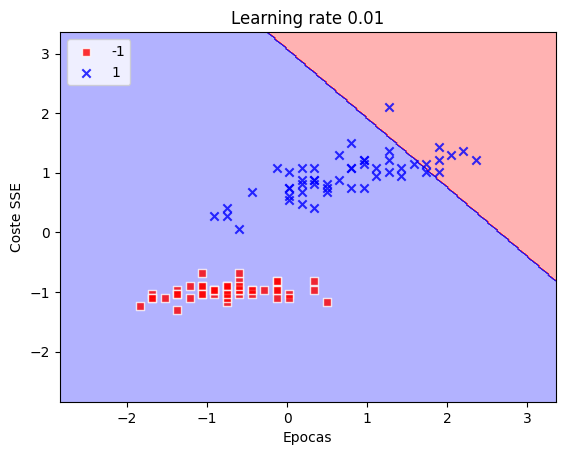

In [100]:
plot_regiones(X_normal, y, clasificador= adal)
plt.title('Adaline - GDS')
plt.legend(loc='upper left')
plt.xlabel('Epocas')
plt.ylabel('Coste SSE')
plt.title('Learning rate 0.01')
plt.show()

## ACTIVIDAD 2. MEJORAS PARA MUCHOS DATOS: DGS.
Imagina que en vez de 100 ejemplos tuviésemos un dataset con millones de ellos. En ese caso, realizar cada
iteración (época) sería muy costoso porque hay que trabajar con todos. Así que entrenar puede llegar a ser una
tarea lenta. Esta modalidad del descenso por gradiente que estamos usando se denomina Batch. Una alternativa
sería la modalidad del descenso por gradiente estocástico1
 (DGS) también conocido como online o iterativo.
Además suele utilizarse un learning rate cambiante:<br><br>

<img src="img/captura20.png" alt="captura20">


<br><br>

Donde c1 y c2 son constantes. Esto hace que el tamaño de los pasos vaya decreciendo a medida que el
algoritmo va realizando más aprendizaje, porque no entrará en el mínimo global de manera tan
directa como el DGB, sino que irá dando más saltos erráticos en todas direcciones. Esto hace que le
cueste más dirigirse hacia la zona adecuada donde está el mínimo. 


## PREGUNTA 6: 
Copia el código de AdalineDGB.py en AdalineDGS.py (o a otra celda del notebook). <br><br>
Modificamos el constructor donde añadimos dos variables de instancia:


In [101]:
# Modificamos el constructor donde añadimos dos variables de instancia:
class AdalineDGS(object):

    def __init__(self, eta=0.01, n_iter=50, semilla=1, desordenado=True):
        self.eta = eta
        self.n_iter = n_iter
        self.semilla = semilla
        self.desordenado = desordenado
        self.w_inicializado = False
    
    # El método para entrenarlo:
    
    def fit(self, X, y):
        """Entrena (Aprende)
        Parámetros:
        ----------
        X (array): [m_ejemplos, n_caracteristicas]
        y (_type_): [n_ejemplos] valores target/label
        Devuelve:
        ----------
        self: object    
        """
        self._inicializa_pesos(X.shape[1])
        self.coste_ = []
        for i in range(self.n_iter):
            if self.desordenado:
                X,y = self._desordena(X,y)
            coste = []
            for xi, target in zip(X, y):
                coste.append(self._actualiza_pesos(xi,target))
            costeMedio = sum(coste) / len(y)
            self.coste_.append(costeMedio)
        return self

    def parcial_fit(self, X, y): # Entrena sin reordenar
        if not self.w_inicializado:
            self._inicializada_pesos(X_shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._actualiza_pesos(xi, target)
        else:
            self._actualiza_pesos(X, y)
        return self

# Y añadimos los métodos auxiliares para desordenar, inicializar pesos y actualizarlos durante el
# entrenamiento

    def _desordena(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _inicializa_pesos(self, m):
        self.rgen = np.random.RandomState(self.semilla)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_inicializado = True
        
    def _actualiza_pesos(self, xi, target):
        salida = self.activacion(self.entradas(xi))
        error = target - salida
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        coste = 0.5 * error**2
        return coste
    
    def entradas(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.entradas(X) >= 0.0, 1, -1)

    def activacion(self, X):
        """Calcula la activacion lineal"""
        return X

## PREGUNTA 7: 
Actualiza el código y lo adaptas para crear y entrenar un objeto **AdalineDGS** que tenga
15 iteraciones y un learning rate de 0.01, repite lo mismo que hicimos con **AdalineDGB** y me pasas los
gráficos de las regiones y el entrenamiento.

Ultimo coste: 0.03234786485683643


C:\Users\ESP\AppData\Local\Temp\ipykernel_7952\1868674423.py:16: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


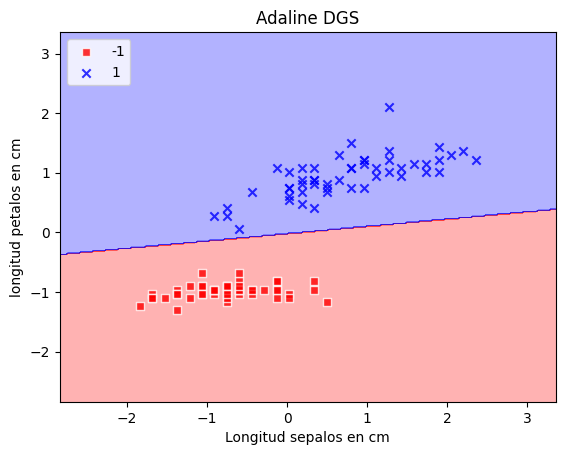

In [102]:
learning_rate = 0.01
adal = AdalineDGS(n_iter=15, eta=learning_rate).fit(X_normal, y)
plt.title('Adaline - DGS')
plt.xlabel('Epocas')
plt.ylabel('Coste SSE')
plt.title(f'Learning rate {learning_rate}')
print(f"Ultimo coste: {adal.coste_[-1]}")

plot_regiones(X_normal, y, clasificador= adal)
plt.xlabel('Longitud sepalos en cm')
plt.ylabel('longitud petalos en cm')
plt.legend(loc='upper left')
plt.title(f'Adaline DGS')

plt.show()

## ACTIVIDAD 3. USAR MODELOS YA PROGRAMADOS.

Normalmente no tendremos que programar a bajo nivel los algoritmos, de hecho, casi siempre los
usaremos los que ya tienen prefabricados las librerías. Por ejemplo, el **Perceptron** y **Adaline** usados
como clasificadores son muy básicos, pero los tenemos implementados en las librería scikit-learn.
Librerías como esta no solo ofrecen una gran cantidad de algoritmos implementados sino también
muchas utilidades para realizar de manera rápida la validación, la medición del desempeño, etc. 
Si no la tienes instalada aún en tu entorno puedes hacerlo mediante el comando (o alguno similar): <br>

`pip install scikit-learn
` 
<br><br>
Vamos a utilizar el dataset iris que ya viene también preinstalado en esta librería y entrenaremos un
perceptrón para que clasifique usando la longitud y la anchura de los pétalos de una orquídea en una
de tres categorías (no dos como programamos nosotros anteriormente) sino tres clases. En primer
lugar cargamos el dataset y lo dividimos en una parte para entrenamiento y otra para validar como
funciona con el método **train_test_split()** indicando que el 30% de los datos serán para validar
(45 ejemplos) y 70% para entrenar (105 ejemplos).


In [103]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print(f'Diferentes clases: {np.unique(y)}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print(f'Contar Labels en y: {np.bincount(y)}')
print(f'Contar Labels en y_train: {np.bincount(y_train)}')
print(f'Contar Labels en y_test: {np.bincount(y_test)}')


Diferentes clases: [0 1 2]
Contar Labels en y: [50 50 50]
Contar Labels en y_train: [35 35 35]
Contar Labels en y_test: [15 15 15]


El propio método, antes de realizar la partición desordena los datos por si acaso estaban todos los de
una misma clase agrupados. Las clases son 3 (Iris-setosa, Iris-versicolor e Iris-virginica) pero ya están
codificadas con los enteros 0, 1, 2.

## PREGUNTA 8: 
Marca las respuestas sobre estos parámetros de la función **train_test_split():** <br> <br>

El parámetro ramdon_state=valor nos va a permitir: <br>
<span style="color: #6CFF36;">X</span> Que si ejecutamos dos veces el código, dará los mismos resultados porque inicializa todo lo que ocurra de manera aleatoria al mismo valor. <br>
O Que todo ocurra de manera impredecible y difícil de repetir. <br><br>
El parámetro stratify = y nos va a permitir: <br>
<span style="color: #6CFF36;">X</span> Que los datos queden balanceados, que tengan cantidades similares de cada clase. <br>
O Que los ejemplos se cojan en grupos como si formasen estratos. <br><br>
El parámetro size = 0.3 nos va a permitir: <br>
O Que el 30% de los datos se usan para entrenar. <br>
<span style="color: #6CFF36;">X</span> Que el 30% de los datos se usan para testar el modelo. <br>
O Que no se cogen el 30% de los datos para mejorar la aleatoriedad de los datos <br>

Escalamos las características normalizándolas o estandarizándolas para mejorar el funcionamiento del
algoritmo de gradiente por descenso. Se aplica la transformación por separado al train y al test pero se
ha configurado de la misma manera usando los datos del train. Es decir, siempre se usa la misma
media y desviación para normalizar ambos conjuntos de datos.

In [104]:
sc = StandardScaler()
sc.fit(X_train)
X_train_normalizado = sc.transform(X_train)
X_test_normalizado = sc.transform(X_test)

Modificamos el método **plot_regiones()** para que sea capaz de mostrar varias regiones que crean las
fronteras de decisión que define un modelo que es el parámetro **clasificador.**

In [105]:
def plot_regiones(X, y, clasificador, test_idx=None, resolucion=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolucion),
                           np.arange(x2_min, x2_max, resolucion))
    Z = clasificador.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolors='black')

    if test_idx is not None: 
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='y', edgecolors='black',
                    alpha=1.0, linewidths=1, marker='o', s=100, label='Test')

Usando este método, crea el gráfico:


C:\Users\ESP\AppData\Local\Temp\ipykernel_7952\622968711.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


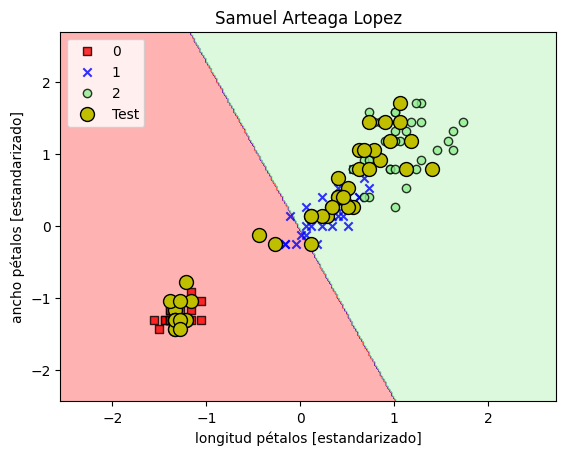

In [106]:
# from sklearn.linear_model import Perceptron

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)  # Train the Perceptron
X_combined_std = np.vstack((X_train_normalizado, X_test_normalizado))
y_combined = np.hstack((y_train, y_test))
plot_regiones(X=X_combined_std, y=y_combined, clasificador=ppn, test_idx=range(105, 150))
plt.xlabel('longitud pétalos [estandarizado]')
plt.ylabel('ancho pétalos [estandarizado]')
plt.title('Samuel Arteaga Lopez')
plt.legend(loc= 'upper left')
plt.show()

## PREGUNTA 9: 
Escribe el código y lo ejecutas. Cuando generes el gráfico, añade tu nombre al título y añade la sentencia que lo guarde en el fichero U02_P02_09.png